In [1]:
import re
import nltk

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import nltk
nltk.download('punkt')

def format_sentence(sent):
    return({word: True for word in nltk.word_tokenize(sent)})

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
import io
pos = []
with io.open("C:/Users/Owner/Downloads/files/Masters/Courses/AIT 580/AIT580-master/data/pos_tweets.txt", 'rU', encoding='utf-8') as f:
    for i in f: 
        pos.append([format_sentence(i), 'pos'])

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
neg = []
with io.open("C:/Users/Owner/Downloads/files/Masters/Courses/AIT 580/AIT580-master/data/neg_tweets.txt", 'rU', encoding='utf-8') as f:
    for i in f: 
        neg.append([format_sentence(i), 'neg'])

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


In [6]:
training = pos[:int((.8)*len(pos))] + neg[:int((.8)*len(neg))]
test = pos[int((.8)*len(pos)):] + neg[int((.8)*len(neg)):]

In [7]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(training)

In [8]:
classifier.show_most_informative_features()

Most Informative Features
                      no = True              neg : pos    =     19.4 : 1.0
                    love = True              pos : neg    =     19.0 : 1.0
                 awesome = True              pos : neg    =     17.2 : 1.0
                headache = True              neg : pos    =     16.2 : 1.0
                      Hi = True              pos : neg    =     12.7 : 1.0
                     fan = True              pos : neg    =      9.7 : 1.0
                   Thank = True              pos : neg    =      9.7 : 1.0
                     New = True              pos : neg    =      9.7 : 1.0
               beautiful = True              pos : neg    =      9.7 : 1.0
                    haha = True              pos : neg    =      9.3 : 1.0


In [9]:
from nltk.classify.util import accuracy
print(accuracy(classifier, test))

0.8308457711442786


In [11]:
textfile = []
with open("C:/Users/Owner/Downloads/Extra_assignment/data/subreddit.txt",encoding='utf8') as f:
    for i in f:
        textfile.append(i) 

words = nltk.word_tokenize(str(textfile))

In [12]:
default_stopwords = stopwords.words('english')
default_stopwords.extend(['...','\'re','n\'t','\'the','\'this','\'it','n\'',
                         'it\\','\'1\\ti','\'0\\ti','\'0\\tda','.\\n','..\\n',
                         '1\\ti','\'1\\tthe'])

In [13]:
words = [word for word in words if len(word) > 2]
words = [word.lower() for word in words]
words = [word for word in words if word not in default_stopwords]

In [14]:
fdist = nltk.FreqDist(words)
for word, frequency in fdist.most_common(15):
    print(u'{};{}'.format(word, frequency))

washington;33
d.c.;31
metro;30
like;25
get;22
'what;22
dc\n;21
anyone;21
city;20
area;18
'dc;18
people;17
'is;17
one;16
need;15


In [15]:
import pip
pip.main(['install', '--user', 'wordcloud'])

You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


0

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequencies=fdist)

(-0.5, 799.5, 399.5, -0.5)

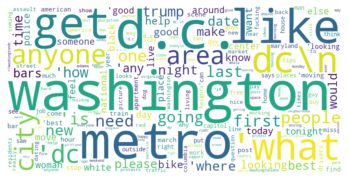

In [17]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [18]:
p=0
n=0
with io.open("C:/Users/Owner/Downloads/Extra_assignment/data/subreddit.txt", 'r+', encoding='utf-8') as f:
    for i in f: 
        classify=classifier.classify(format_sentence(i))
        if classify=='neg':
            n=n+1
        elif classify=='pos':
            p=p+1
if n>p:
    print('negative')
else:
    print('positive')

negative


In [21]:
output=open("text1_sentiment.txt","w+",encoding='utf-8')
with io.open("C:/Users/Owner/Downloads/Extra_assignment/data/subreddit.txt", 'r+', encoding='utf-8') as f:
    for i in f: 
        x=classifier.classify(format_sentence(i))
        y=x+" "+i
        print(y)

neg The most pensive man in Union Station

neg Can we get rid of racist restaurant [daily grill dc] bullshit in this city?

pos I brought cannabis into the Senate building and rolled a joint in Sen Sessions office. Here for AMA..We need your help!http://www.usnews.com/news/articles/2016-12-08/activists-roll-joint-offer-free-pot-at-jeff-sessions-office-as-threats-swirl-to-legalization-framework

neg Donald Trump hates newspapers. Therefore, I am upgrading my Washington Post subscription to 7-day home delivery

neg Posted yesterday about stuck in DC

neg Sorry I ruined your Monday morning commute, but our planet is on a highway to hell

pos The price Muslims are paying!

pos I'd be the R***skins #! fan if............

pos Active Shooter - Silver Spring MD

pos blessed image

neg George Washington U Bans Palestinian Flag on Campus

pos Immigration Checkpoint on Georgia Ave near Silver Spring on Friday 02/26

neg PSA: If you are riding a bike, please do so on the street. This summer has br


neg Vegan Pecan Pie?

pos Looking for new friends

neg Men's haircut

pos US Capitol on a nice day.

neg Gentrification is not in DC is not just a black and white issue (GGW)

pos Craft coffee, million-dollar condos and D.C.’s relentless gentrification

pos "Districtland," basically "Girls" set/filmed in DC

neg Spotted at Amsterdam Falafel 14th st

pos Apology to the women of DC

neg After the last play of the Super Bowl at the R/WashingtonDC meet up

pos Are you a Republican having a hard time finding a date in liberal Washington, DC? There's now a website for you

neg Visiting for 2 weeks

pos Stabbing victim waits 30 minutes for an ambulance in Southeast DC. (This would NEVER happen in Northwest regardless of how stressed the system is.)

neg A Tool Meant to Help Minorities Buy Homes Is Instead Speeding up Gentrification in D.C.

pos Any Chester Bennington remembrance events going on in the DC area on Saturday?

pos Any good place to have a drink today?

pos Go-go’s fight against 


neg Prospective Student

neg Suggestions for alterations near Glover Park/Tenleytown?

pos Daughter looking for single apartment in DC

pos For anyone who wants to rep Brookland

pos hey D.C.! We're BABY BABY from ATL and we're playing DC9 on 12/18. you're welcome to come!

neg Mark Wahlberg-backed burger shop coming to Ballston, Dupont Circle

neg Roadtrip Help

pos Newbie coming to DC!

neg [MEME] Gov't watching OPM like it's the Powerball

pos Beautiful January in dc

neg Why Washington players may finally kill the 'Redskins' name for good

pos Chick fil A opening in D.C. Residents in eligible D.C. Zip Codes could win free Chick Fil A for a year. Who's eligible? People with Zip Codes in most of D.C. And Arlington. Who's not eligible? People with D.C. Zip Codes east of the Anacostia river.

neg I proposed to my gf at the Lincoln Memorial but didn't get a picture of it!!! (3/17/15) (9PM)

pos iStrategyLabs: Small Agency of the Year 2014 by Ad Age

neg It's time for CoHiBoGaGro

pos D


neg Antifa protesters couldn’t find any fascists at Unite the Right — and harassed the press instead

pos Oh, I hear you like night pictures of downtown.

neg George Washington University fires doctor for having cancer

neg Tell Mayor Bowser that high quality dedicated-lane transit must remain a top transportation priority

neg Donald Trump Mummy in Woodley Park

neg Washington Times: D.C. Metro 'finances worse than operations,' privatization on the table.

neg Scalia's body at SCOTUS

pos Came across some hypocritical signs today (S St NW)

neg 4/20 Activities

pos New to DC. Wheres the artsy scene.

neg [HYPOTHETICAL] Thoughts on removing the Whitehurst Freeway?

pos Saw a homeless man shit on Massachusetts that's all I can really say, and all I really need to see now in DC.

neg Where to live?

pos I can google many lists of them, but which is your favorite farmer’s market in the DC area?

pos I wrote a play about the DC Sniper.

neg I think I’ll wait for the orange line...

pos Me